In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 11.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import shap

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/drug200.csv")
df.head()
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Drug']= label_encoder.fit_transform(df['Drug'])
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol'])
df['BP']= label_encoder.fit_transform(df['BP'])
df['Sex'].unique()
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
X = df.drop("Cholesterol", axis=1)
y = df["Drug"]

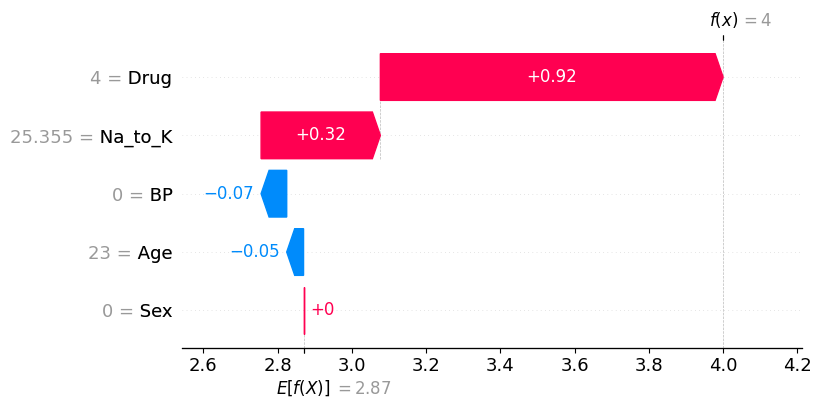

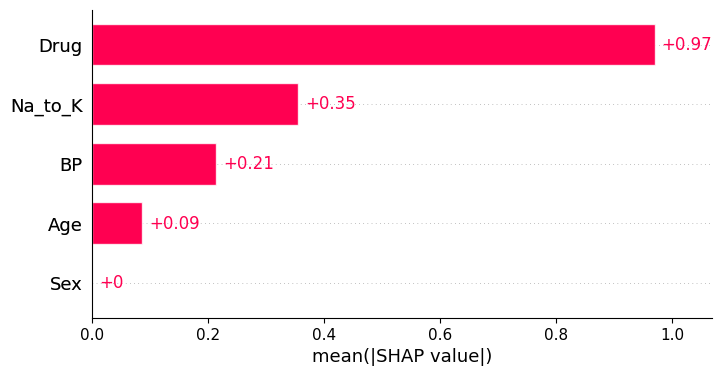

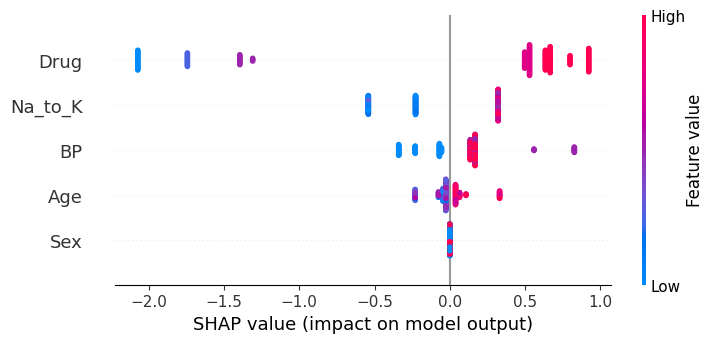

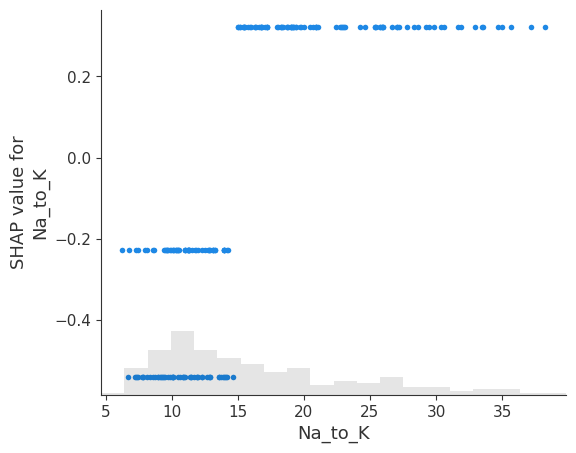

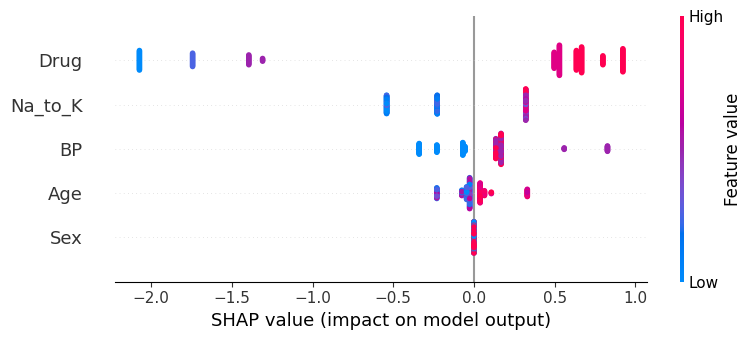

In [ ]:
# Display the resulting dataframe
df.fillna(df.mean(),inplace=True)

%matplotlib inline


shap.initjs()
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)
shap.plots.scatter(shap_values[:,"Na_to_K"])
shap.summary_plot(shap_values)